## MSCFE 650 GROUP 3-B SUBMISSION 3 - MODELING AND STRATEGY DEVELOPMENT

### Group Members:

1. Gam Dieudonne Kimal
2. Joe Frank
3. Eniola Igunnu
4. Ndenge Gerald Atumu

## INTRODUCTION

This document is simply a continuation of our previous work where we used feature engineering to select some features from our prepared data for modelling. Our goal here will be to implement a machine learning algorithmic trading strategy on the selected features. Our data remains thesame -  Google stock data from Yahoo finance ( our data from submission 1 & 2) for a five year period ending December 2019. To arrive at our goal, we will:

1. Fit our Model
2. Do a performance analysis
3. Build a fund fact sheet


In compiling this project work codes were adapted from  the follwing sites:
1. https://www.youtube.com/watch?v=fOTGBo2BIOc
2. https://alphascientist.com/
3. https://medium.com/predictive-analytics-for-stock-market-prediction/machine-learning-algorithm-for-stock-prediction-e75c678d05c7
4. https://ucilnica.fri.uni-lj.si/mod/resource/view.php?id=28089
5. https://towardsdatascience.com/abeginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f
6. https://github.com/BlackArbsCEO/Adv_Fin_ML_Exercises
7. https://scikitlearn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html.
8. https://buildmedia.readthedocs.org/media/pdf/technical-analysis-library-in-python/latest/technical-analysis-library-in-python.pdf
9. Advances in Financial Machine Learning written by Marcos Lopez de Prado

#### *Loading neccesary modules*

In [5]:
import yfinance as yf # Get data from web
import pandas as pd # tables and data manipulation
import numpy as np # vectors and matrices
import matplotlib.pyplot as plt # plots
%matplotlib inline
import matplotlib as mpl
import ta as ta
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
from scipy.spatial import distance
from sklearn.base import clone
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
import datetime as dt
import urllib.request, json
import os
import numpy as np
import tensorflow as tf
import mlfinlab as ml
import pyfolio as pf
from sklearn.metrics import r2_score,mean_absolute_error
import warnings
warnings.filterwarnings("ignore")




C:\Users\gerard.ndenge\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\gerard.ndenge\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\gerard.ndenge\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\g



Support us on Patreon: https://www.patreon.com/HudsonThames

MlFinLab needs you! We need your help for us to keep on maintaining and implementing academic research based on 
financial machine learning (for open-source). In order for us to continue we need to raise $4000 of monthly donations
via Patreon - by December 2020. If we can't reach our goal, we will need to adopt more of a paid for service. We thought
that the best and least impactful course of action (should we not reach our goal) is to leave the package as open-source
but to make the documentation (ReadTheDocs) a paid for service. This is the ultimate litmus test, if the package is a 
value add, then we need the community to help us keep it going.

Our road map for 2020 is to implement the text book: Machine Learning for Asset Managers by Marcos Lopez de Prado, 
as well as a few papers from the Journal of Financial Data Science. We are hiring a full time developer for 3 months 
to help us reach our goals. The money that you

#### *Loading Google data*

In [6]:
goog = yf.download('GOOG', start = '2015-01-01', end = '2019-12-31')

# Convert index to datetime
goog.index = pd.to_datetime(goog.index)

print(goog.head())

[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2014-12-31  529.795471  531.141724  524.360352  524.958740  524.958740   
2015-01-02  527.561584  529.815369  522.665039  523.373108  523.373108   
2015-01-05  521.827332  522.894409  511.655243  512.463013  512.463013   
2015-01-06  513.589966  514.761719  499.678131  500.585632  500.585632   
2015-01-07  505.611847  505.855164  498.281952  499.727997  499.727997   

             Volume  
Date                 
2014-12-31  1368200  
2015-01-02  1447500  
2015-01-05  2059800  
2015-01-06  2899900  
2015-01-07  2065000  


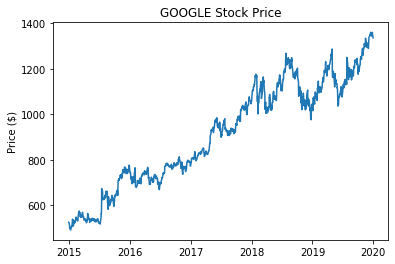

In [7]:
# Plotting the adjusted close of our stock info
plt.plot(goog.index, goog['Adj Close'])
plt.title('GOOGLE Stock Price')
plt.ylabel('Price ($)');
plt.show()

Already we can observe a rise in the stock price of google over the years with some very noticeable up and downward swings between 2018 and 2019

## A. BUILDING TARGET VARIABLE AND SELECTED FEATURES FROM LAST SUBMISSION


In [8]:
# Normalize the data using MinMaxSclare
scaler = MinMaxScaler(feature_range=(0, 1))
goog_bars = pd.DataFrame(scaler.fit_transform(goog), index=goog.index)
goog_bars.columns = ['Open','High','Low','Close','Adj Close','Volume']  
goog_bars.head()


Open      High       Low     Close  Adj Close    Volume
Date                                                                   
2014-12-31  0.041951  0.041963  0.044014  0.038803   0.038803  0.094357
2015-01-02  0.039384  0.040439  0.042057  0.036980   0.036980  0.101688
2015-01-05  0.032793  0.032487  0.029350  0.024439   0.024439  0.158291
2015-01-06  0.023325  0.023144  0.015527  0.010787   0.010787  0.235953
2015-01-07  0.014156  0.012911  0.013915  0.009801   0.009801  0.158772

In [9]:
Features = pd.DataFrame(index=goog.index).sort_index()

In [10]:
Features['Y'] = goog_bars["Adj Close"]

In [11]:
Features['F1'] = ta.volatility.average_true_range(goog_bars['High'], goog_bars['Low'], goog_bars['Adj Close'], fillna=False)
Features.head()

Features['F2'] = goog_bars['Adj Close'].ewm(span=50, adjust=False).mean()
Features.head()

Features['F3'] = (goog_bars['High']- goog_bars['Low']/goog_bars['Adj Close']*100)
Features.head()

Features['F4'] = goog_bars['Adj Close'].apply(np.log)
Features.head()

Features['F5'] = stats.zscore(goog_bars['Adj Close'])
Features.head() 

Features['F6'] = (goog_bars['Adj Close']- goog_bars['Volume']/goog_bars['Volume']*100)
Features.head()

Y   F1        F2          F3        F4        F5         F6
Date                                                                          
2014-12-31  0.038803  0.0  0.038803 -113.386378 -3.249260 -1.680605 -99.961197
2015-01-02  0.036980  0.0  0.038731 -113.687387 -3.297370 -1.687473 -99.963020
2015-01-05  0.024439  0.0  0.038171 -120.060069 -3.711555 -1.734728 -99.975561
2015-01-06  0.010787  0.0  0.037097 -143.918282 -4.529428 -1.786174 -99.989213
2015-01-07  0.009801  0.0  0.036027 -141.965661 -4.625269 -1.789888 -99.990199

In [12]:
Features = Features.dropna()
Y = Features.iloc[:,0]
X = Features.iloc[:,1:7]

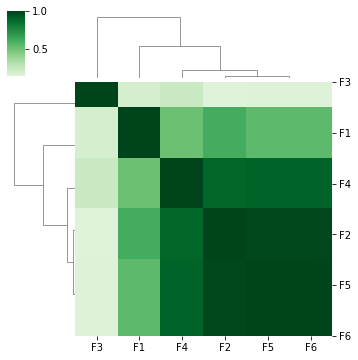

In [13]:
## Feature correlations

corr_matrix = X.corr()
correlations_array = np.asarray(corr_matrix)
linkage = hierarchy.linkage(distance.pdist(correlations_array), \
                            method='average')
g = sns.clustermap(corr_matrix,row_linkage=linkage,col_linkage=linkage,\
                   row_cluster=True,col_cluster=True,figsize=(5,5),cmap='Greens',center=0.5)
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()
label_order = corr_matrix.iloc[:,g.dendrogram_row.reordered_ind].columns

## B. ENSEMBLING TECHNIQUE

### Building Base Models

In [14]:
# DEVELOPING A WALK FORWARD FUNCTION

def wf(data, samples, test_percent, anchored=False):
    lenght = len(data)
    test_lenght = round(samples *(test_percent/100))
    steps = round((lenght - samples) / test_lenght)
    print(steps)

    y_test_total = np.zeros(shape=(0,3))
    
    
    for i in range(0,steps):
        print(i)
        if anchored == False:
            if i==steps-1:

                start = ((i)*test_lenght)
                data_wf = data[(((i)*test_lenght)) : lenght]
                y_test = build_model(data_wf, len(data_wf)-round(samples *(1-(test_percent/100))))
                y_test_total = np.concatenate([y_test_total,y_test])
            else:

                data_wf = data.iloc[(i*test_lenght):((i*test_lenght)+samples)]
                end = ((i*test_lenght)+samples)
                start = (i*test_lenght)
                y_test = build_model(data_wf, test_percent/100)
                y_test_total = np.concatenate([y_test_total,y_test])
                
        else:
            if i==steps-1:

                start = 0
                data_wf = data[0 : lenght]
                y_test = build_model(data_wf, len(data)-samples-(test_lenght*(i-1))) 
                y_test_total = np.concatenate([y_test_total,y_test])
            

            else:

                data_wf = data.iloc[0:((i*test_lenght)+samples)]
                end = ((i*test_lenght)+samples)
                start = (0)
                y_test = build_model(data_wf, test_lenght)
                y_test_total = np.concatenate([y_test_total,y_test])

    alldf = np.vstack(y_test_total)

    return alldf

In [15]:
def build_model(data_wf, test_percent): 
    Y = Features.iloc[:,0]
    X = Features.iloc[:,1:7]
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= test_percent, shuffle = False, random_state=42)
    print('X_train shape ' + str(X_train.shape))
    print('X_test shape ' + str(X_test.shape))
    print('y_train shape ' + str(y_train.shape))
    print('y_test shape ' + str(y_test.shape))
    
    regr = linear_model.LinearRegression()
    regr.fit(X_train, y_train)
    y_pred = pd.DataFrame(regr.predict(X_test))
    y_test = pd.DataFrame(y_test).reset_index()
    y_test['prediction'] = y_pred
    return(y_test) 


In [16]:
# Linear predictions of first base Model
Linear_alldf = wf(Features,1000,10) 
    


3
0
X_train shape (1130, 6)
X_test shape (126, 6)
y_train shape (1130,)
y_test shape (126,)
1
X_train shape (1130, 6)
X_test shape (126, 6)
y_train shape (1130,)
y_test shape (126,)
2
X_train shape (1100, 6)
X_test shape (156, 6)
y_train shape (1100,)
y_test shape (156,)


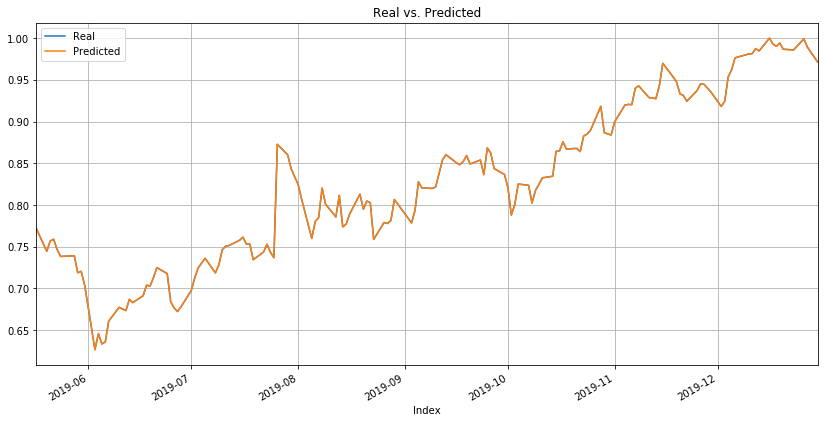

In [17]:
Linear_alldf = pd.DataFrame( Linear_alldf)
Linear_alldf.columns = ['Index','Real','Predicted'] 
Linear_alldf.tail(50000).plot(0, figsize=(14,7), grid=True, title = 'Real vs. Predicted')

In [18]:
def wf2(data, samples, test_percent, anchored=False):
    lenght = len(data)
    test_lenght = round(samples *(test_percent/100))
    steps = round((lenght - samples) / test_lenght)
    print(steps)

    y_test_total = np.zeros(shape=(0,3))
    
    
    for i in range(0,steps):
        print(i)
        if anchored == False:
            if i==steps-1:

                start = ((i)*test_lenght)
                data_wf = data[(((i)*test_lenght)) : lenght]
                y_test = build_model2(data_wf, len(data_wf)-round(samples *(1-(test_percent/100))))
                y_test_total = np.concatenate([y_test_total,y_test])
            else:

                data_wf = data.iloc[(i*test_lenght):((i*test_lenght)+samples)]
                end = ((i*test_lenght)+samples)
                start = (i*test_lenght)
                y_test = build_model2(data_wf, test_percent/100)
                y_test_total = np.concatenate([y_test_total,y_test])
                
        else:
            if i==steps-1:

                start = 0
                data_wf = data[0 : lenght]
                y_test = build_model2(data_wf, len(data)-samples-(test_lenght*(i-1))) 
                y_test_total = np.concatenate([y_test_total,y_test])
            

            else:

                data_wf = data.iloc[0:((i*test_lenght)+samples)]
                end = ((i*test_lenght)+samples)
                start = (0)
                y_test = build_model2(data_wf, test_lenght)
                y_test_total = np.concatenate([y_test_total,y_test])

    alldf = np.vstack(y_test_total)

    return alldf

In [19]:
def build_model2(data_wf, test_percent): 
    Y = Features.iloc[:,0]
    X = Features.iloc[:,1:7]
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= test_percent, shuffle = False, random_state=42)
    print('X_train shape ' + str(X_train.shape))
    print('X_test shape ' + str(X_test.shape))
    print('y_train shape ' + str(y_train.shape))
    print('y_test shape ' + str(y_test.shape))
    
    Tree_regr = ExtraTreesRegressor()
    Tree_regr.fit(X_train, y_train)
    y_pred = pd.DataFrame(Tree_regr.predict(X_test))
    y_test = pd.DataFrame(y_test).reset_index()
    y_test['prediction'] = y_pred
    return(y_test) 

In [20]:
 # Trees Regressor of second Base model
    
Tree_alldf = wf2(Features,1000,10) 

3
0
X_train shape (1130, 6)
X_test shape (126, 6)
y_train shape (1130,)
y_test shape (126,)
1
X_train shape (1130, 6)
X_test shape (126, 6)
y_train shape (1130,)
y_test shape (126,)
2
X_train shape (1100, 6)
X_test shape (156, 6)
y_train shape (1100,)
y_test shape (156,)


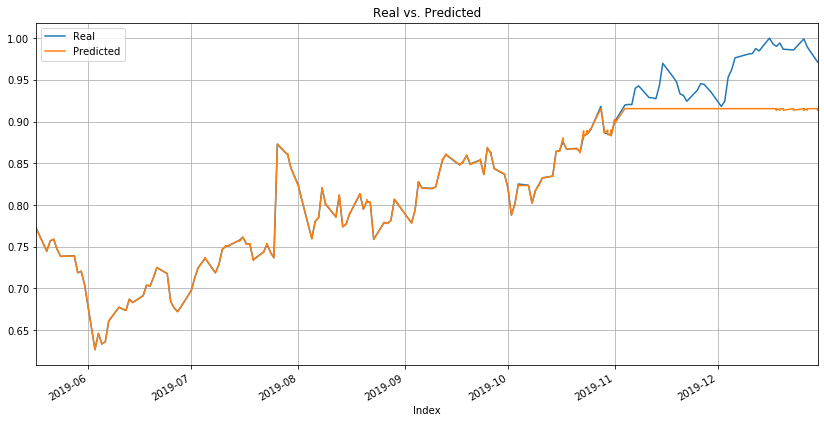

In [21]:
Tree_alldf = pd.DataFrame( Tree_alldf)
Tree_alldf.columns = ['Index','Real','Predicted'] 
Tree_alldf.tail(50000).plot(0, figsize=(14,7), grid=True, title = 'Real vs. Predicted')

## C. MAKING THE ENSEMBLE MODEL

Ensembling the predictions of both models and making the ensemble prediction

In [22]:
ensemble_df = pd.merge(Linear_alldf, Tree_alldf, on='Index', how='left').dropna()
New_X = ensemble_df.drop(['Index','Real_x','Real_y'],axis=1)
New_Y = Y.reset_index()
result = pd.concat([New_Y, New_X], axis=1)
result=result.dropna()
Ensemble_res =result.set_index('Date')

In [23]:
def wf3(data, samples, test_percent, anchored=False):
    lenght = len(data)
    test_lenght = round(samples *(test_percent/100))
    steps = round((lenght - samples) / test_lenght)
    print(steps)

    y_test_total = np.zeros(shape=(0,3))
    
    
    for i in range(0,steps):
        print(i)
        if anchored == False:
            if i==steps-1:

                start = ((i)*test_lenght)
                data_wf = data[(((i)*test_lenght)) : lenght]
                y_test = build_model3(data_wf, len(data_wf)-round(samples *(1-(test_percent/100))))
                y_test_total = np.concatenate([y_test_total,y_test])
            else:

                data_wf = data.iloc[(i*test_lenght):((i*test_lenght)+samples)]
                end = ((i*test_lenght)+samples)
                start = (i*test_lenght)
                y_test = build_model3(data_wf, test_percent/100)
                y_test_total = np.concatenate([y_test_total,y_test])
                
        else:
            if i==steps-1:

                start = 0
                data_wf = data[0 : lenght]
                y_test = build_model3(data_wf, len(data)-samples-(test_lenght*(i-1))) 
                y_test_total = np.concatenate([y_test_total,y_test])
            

            else:

                data_wf = data.iloc[0:((i*test_lenght)+samples)]
                end = ((i*test_lenght)+samples)
                start = (0)
                y_test = build_model3(data_wf, test_lenght)
                y_test_total = np.concatenate([y_test_total,y_test])

    alldf = np.vstack(y_test_total)

    return alldf

In [24]:
def build_model3(data_wf, test_percent): 
    Y = Ensemble_res.iloc[:,0]
    X = Ensemble_res.iloc[:,1:3]
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= test_percent, shuffle = False, random_state=42)
    print('X_train shape ' + str(X_train.shape))
    print('X_test shape ' + str(X_test.shape))
    print('y_train shape ' + str(y_train.shape))
    print('y_test shape ' + str(y_test.shape))
    
    ens_cl = RandomForestRegressor()
    ens_cl.fit(X_train, y_train)
    y_pred = pd.DataFrame(ens_cl.predict(X_test))
    y_test = pd.DataFrame(y_test).reset_index()
    y_test['prediction'] = y_pred
    return(y_test) 

In [25]:
#The ensemble Prediction

Ra_ensdf = wf3(Ensemble_res,800,10) 

5
0
X_train shape (1047, 2)
X_test shape (117, 2)
y_train shape (1047,)
y_test shape (117,)
1
X_train shape (1047, 2)
X_test shape (117, 2)
y_train shape (1047,)
y_test shape (117,)
2
X_train shape (1047, 2)
X_test shape (117, 2)
y_train shape (1047,)
y_test shape (117,)
3
X_train shape (1047, 2)
X_test shape (117, 2)
y_train shape (1047,)
y_test shape (117,)
4
X_train shape (1040, 2)
X_test shape (124, 2)
y_train shape (1040,)
y_test shape (124,)


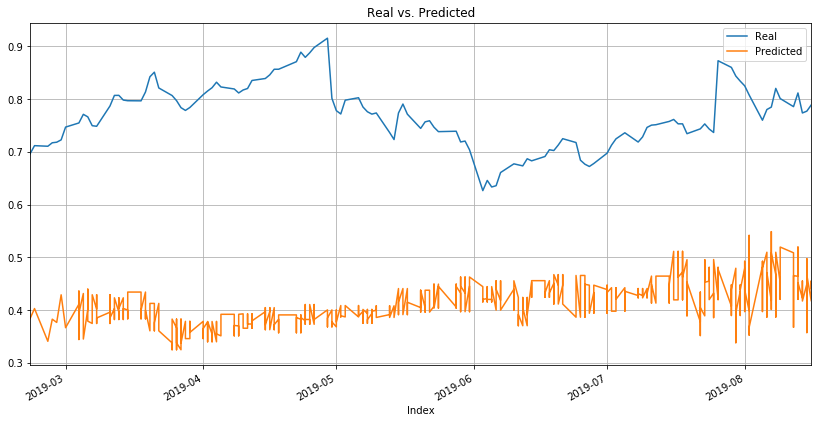

In [26]:
Ra_ensdf = pd.DataFrame( Ra_ensdf)
Ra_ensdf.columns = ['Index','Real','Predicted'] 
Ra_ensdf.tail(50000).plot(0, figsize=(14,7), grid=True, title = 'Real vs. Predicted')

## D. LONG SHORT-TERM MEMORY (LSTM) WITH EXPONENTIAL SMOOTING


In [27]:
# First calculate the mid prices from the highest and lowest
high_prices = goog.loc[:,'High'].as_matrix()
low_prices = goog.loc[:,'Low'].as_matrix()
mid_prices = (high_prices+low_prices)/2.0

In [28]:
train_data = mid_prices[:629]
test_data = mid_prices[629:]

In [29]:
scaler = MinMaxScaler()
train_data = train_data.reshape(-1,1)
test_data = test_data.reshape(-1,1)

In [30]:
# Train the Scaler with training data and smooth data
smoothing_window_size = 100
for di in range(0,600,smoothing_window_size):
    scaler.fit(train_data[di:di+smoothing_window_size,:])
    train_data[di:di+smoothing_window_size,:] = scaler.transform(train_data[di:di+smoothing_window_size,:])

# You normalize the last bit of remaining data
scaler.fit(train_data[di+smoothing_window_size:,:])
train_data[di+smoothing_window_size:,:] = scaler.transform(train_data[di+smoothing_window_size:,:])

In [31]:
# Reshape both train and test data
train_data = train_data.reshape(-1)

# Normalize test data
test_data = scaler.transform(test_data).reshape(-1)

In [32]:
# Now perform exponential moving average smoothing
# So the data will have a smoother curve than the original ragged data
EMA = 0.0
gamma = 0.1
for ti in range(600):
    EMA = gamma*train_data[ti] + (1-gamma)*EMA
    train_data[ti] = EMA

# Used for visualization and test purposes
all_mid_data = np.concatenate([train_data,test_data],axis=0)

In [33]:
window_size = 10
N = train_data.size

run_avg_predictions = []
run_avg_x = []

mse_errors = []

running_mean = 0.0
run_avg_predictions.append(running_mean)

decay = 0.5

for pred_idx in range(1,N):
    
   
    running_mean = running_mean*decay + (1.0-decay)*train_data[pred_idx-1]
    run_avg_predictions.append(running_mean)
    mse_errors.append((run_avg_predictions[-1]-train_data[pred_idx])**2)
   

print('MSE error for EMA averaging: %.5f'%(0.5*np.mean(mse_errors)))

MSE error for EMA averaging: 0.00181


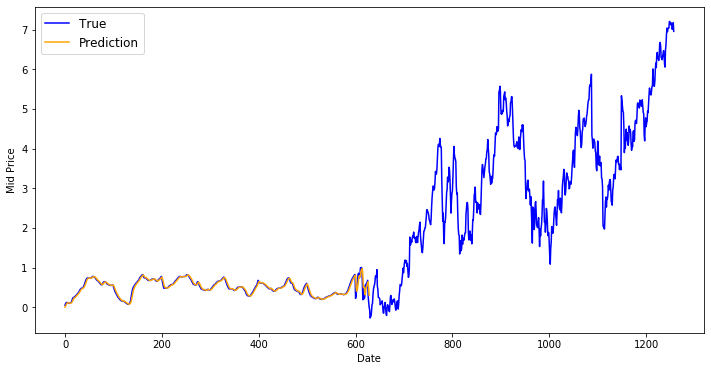

In [34]:
plt.figure(figsize = (12,6))
plt.plot(range(goog.shape[0]),all_mid_data,color='b',label='True')
plt.plot(range(0,N),run_avg_predictions,color='orange', label='Prediction')

#plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
plt.xlabel('Date')
plt.ylabel('Mid Price')
plt.legend(fontsize=12)
plt.show()

## E.  LONG SHORT-TERM MEMORY (LSTM) WITH DECISION TREE CLASSIFIER

In [37]:
# Compute sides
Feat=Features
Feat['side'] = np.nan 

long_signals = (Feat['Y'] <= (np.percentile(Feat['Y'], 25)))
short_signals = (Feat['Y'] >= (np.percentile(Feat['Y'], 75))) 

Feat.loc[long_signals, 'side'] = 1
Feat.loc[short_signals, 'side'] = -1

print(Feat.side.value_counts())

# Remove Look ahead bias by lagging the signal
Feat['side'] = Feat['side'].shift(1)

-1.0    314
 1.0    314
Name: side, dtype: int64


In [38]:
# Compute daily volatility
daily_vol = ml.util.get_daily_vol(close=Feat['Y'], lookback=50)

# Apply Symmetric CUSUM Filter and get timestamps for events given the daily volatility
cusum_events = ml.filters.cusum_filter(Feat['Y'], 
                                    threshold = daily_vol['2005-01-01':'2019-01-01'].mean() * 0.1)

# Compute vertical barrier
vertical_barriers = ml.labeling.add_vertical_barrier(t_events = cusum_events, close=Feat['Y'], num_days=1)

In [39]:
pt_sl = [0, 2]
min_ret = 0.0005
triple_barrier_events = ml.labeling.get_events(close=Feat['Y'],
                                            t_events=cusum_events,
                                            pt_sl=pt_sl,
                                            target=daily_vol,
                                            min_ret=min_ret,
                                            num_threads=2,
                                            vertical_barrier_times=vertical_barriers,
                                            side_prediction=Feat['side'])

2020-03-24 20:41:57.642720 100.0% apply_pt_sl_on_t1 done after 0.96 minutes. Remaining 0.0 minutes.


In [40]:
labels = ml.labeling.get_bins(triple_barrier_events, Feat['Y'])
print(labels.shape)
print(labels.head())

(871, 4)
                 ret      trgt  bin  side
2015-01-05 -0.558631  0.206581    0   1.0
2015-01-06 -0.091391  0.331884    0   1.0
2015-01-07  0.184797  0.291814    1   1.0
2015-01-08 -0.642647  0.343090    0   1.0
2015-01-09  0.002764  0.322224    1   1.0


In [41]:
# Get features at event dates
x = Feat.loc[Feat.index, :]

# Drop unwanted columns
x.drop(['Y','side'], axis=1, inplace=True)

x = x.iloc[-871:]
x.tail()


F1        F2         F3        F4        F5         F6
Date                                                                    
2019-12-20  0.008226  0.931319 -99.921322 -0.013400  1.891165 -99.013311
2019-12-23  0.008162  0.933457 -99.722476 -0.014274  1.887917 -99.014173
2019-12-26  0.008182  0.937776 -98.145567 -0.000886  1.937987 -99.000885
2019-12-27  0.007836  0.939798 -99.686779 -0.010724  1.901127 -99.010667
2019-12-30  0.008052  0.941030 -99.759896 -0.029193  1.832909 -99.028771

In [42]:
y = labels['bin']
print(y.head())

2015-01-05    0
2015-01-06    0
2015-01-07    1
2015-01-08    0
2015-01-09    1
Name: bin, dtype: int64


In [43]:
# Splinting the data into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=False)

In [44]:
n_estimator = 800
depth = 3
random_state = 400

rf = RandomForestClassifier(max_depth=depth, n_estimators=n_estimator,
                            criterion='entropy', class_weight='balanced_subsample',
                            random_state=random_state)
rf = rf.fit(np.nan_to_num(X_train),np.nan_to_num(y_train))


In [45]:
y_pred_rf = rf.predict_proba(X_train)[:, 1]
y_pred = rf.predict(X_train)
fpr_rf, tpr_rf, _ = metrics.roc_curve(y_train, y_pred_rf)
print(metrics.classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.60      0.74       456
           1       0.44      0.94      0.60       153

    accuracy                           0.69       609
   macro avg       0.71      0.77      0.67       609
weighted avg       0.84      0.69      0.71       609



In [46]:
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_train, y_pred))


Confusion Matrix:
[[275 181]
 [  9 144]]


In [47]:
print("Accuracy:")
print(metrics.accuracy_score(y_train, y_pred))

Accuracy:
0.6880131362889984


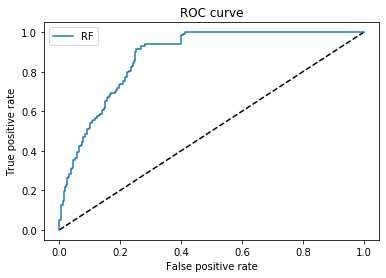

In [48]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [49]:
y_pred_rf = rf.predict_proba(np.nan_to_num(X_test))[:, 1]
y_pred = rf.predict(np.nan_to_num(X_test))
fpr_rf, tpr_rf, _ = metrics.roc_curve(y_test, y_pred_rf)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78       168
           1       0.00      0.00      0.00        94

    accuracy                           0.64       262
   macro avg       0.32      0.50      0.39       262
weighted avg       0.41      0.64      0.50       262



In [50]:
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[168   0]
 [ 94   0]]


In [51]:
print("Accuracy:")
print(metrics.accuracy_score(y_test, y_pred))

Accuracy:
0.6412213740458015


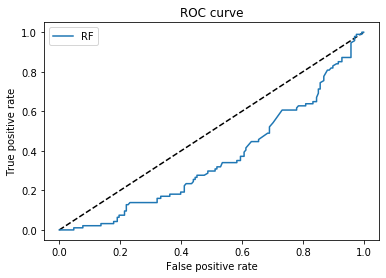

In [52]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [53]:
RSQ = r2_score(y_test, y_pred)
RSQ

-0.55952380952381

In [54]:
MAE = mean_absolute_error(y_test, y_pred)
MAE

0.35877862595419846

In [55]:
MSQ = metrics.mean_squared_error(y_test, y_pred)
MSQ

0.35877862595419846

## F. FUND FACT SHEET

In [56]:
print(y_pred.shape)

(262,)


In [61]:
returns = ta.others.daily_log_return(Feat['Y'], fillna=False)

In [62]:
returns = returns[-262:]

In [63]:
pred_returns = np.mean(y_pred)*returns
real_returns = np.mean(y_test)*returns
print(pred_returns)
print(real_returns)

Date
2018-12-13   -0.0
2018-12-14   -0.0
2018-12-17   -0.0
2018-12-18    0.0
2018-12-19   -0.0
             ... 
2019-12-20   -0.0
2019-12-23   -0.0
2019-12-26    0.0
2019-12-27   -0.0
2019-12-30   -0.0
Name: d_logret, Length: 262, dtype: float64
Date
2018-12-13   -0.111730
2018-12-14   -1.266867
2018-12-17   -1.705156
2018-12-18    0.822344
2018-12-19   -0.382495
                ...   
2019-12-20   -0.268584
2019-12-23   -0.031361
2019-12-26    0.480365
2019-12-27   -0.352998
2019-12-30   -0.662621
Name: d_logret, Length: 262, dtype: float64


Entire data start date: 2018-12-14
Entire data end date: 2019-12-30
Backtest months: 12


Backtest
Annual return           0.0%
Cumulative returns      0.0%
Annual volatility       0.0%
Sharpe ratio             NaN
Calmar ratio             NaN
Stability               0.00
Max drawdown            0.0%
Omega ratio              NaN
Sortino ratio            NaN
Skew                    0.00
Kurtosis               -3.00
Tail ratio               NaN
Daily value at risk     0.0%
Alpha                   0.00
Beta                    0.00

Worst drawdown periods Net drawdown in %  Peak date Valley date Recovery date  \
0                                   0.00 2018-12-14  2018-12-14    2018-12-14   
1                                   0.00 2018-12-14  2018-12-14    2018-12-14   
2                                   0.00 2018-12-14  2018-12-14    2018-12-14   
3                                   0.00 2018-12-14  2018-12-14    2018-12-14   
4                                   0.00 2018-12-14  2018-12-14    2018-12-14   

Worst drawdown periods Duration  
0                             1  
1                             1  
2                             1  
3                             1  
4                             1

TypeError: Already tz-aware, use tz_convert to convert.

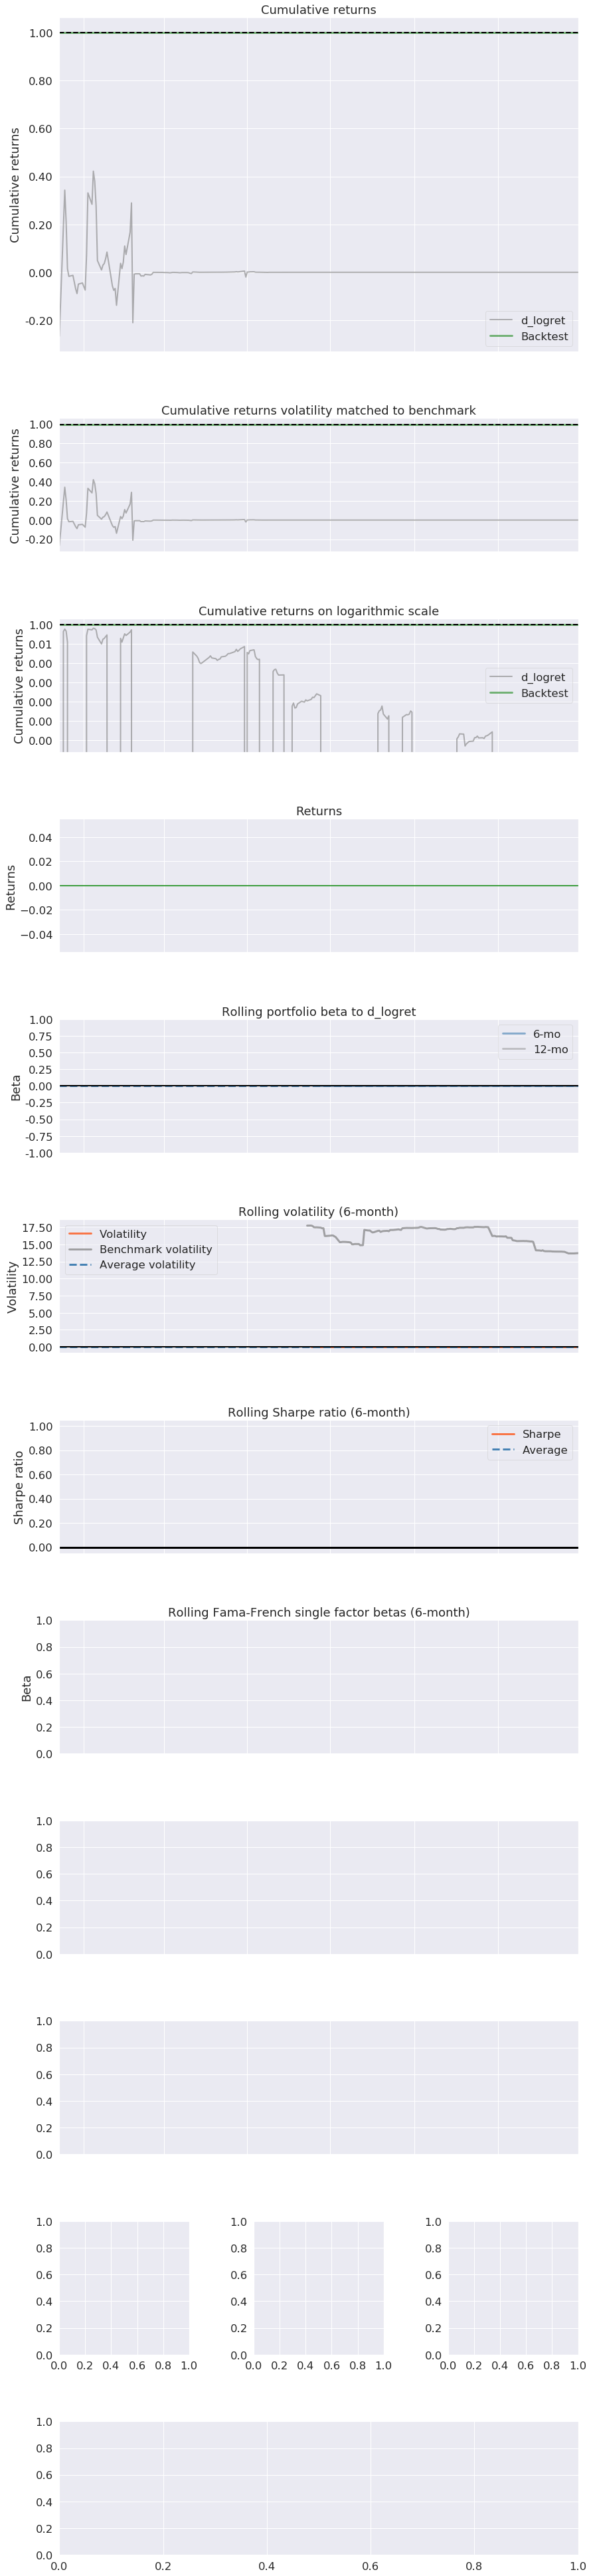

In [64]:
# Compute fact sheet on real returns
fact_sheet = pf.create_returns_tear_sheet(pred_returns, benchmark_rets=real_returns)